# Data Distribution, A/B Test & Permutation Test

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

### Part 1. Data Exploration

The `food_consumption.csv` dataset from the `food` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Let's load it to a DataFrame (we will call it `food`) and let's check its contents.

In [3]:
food = pd.read_excel('data/food_consumption.xlsx')

food.info()
# All columns are already formatted in the expected dtype and there are no null values:
# The DataFrame does not need cleaning.

food.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96


1. Now let's use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. Let's answer to the question: **which `food_category` has the highest median value of `food_consumption`?** 

In [4]:
# Q1. PART 1

df = food.groupby('food_category')['consumption'].describe()
df

,count,mean,std,min,25%,50%,75%,max
food_category,,,,,,,,
beef,130.0,12.123385,9.654140,0.78,4.9975,8.285,17.9400,55.48
dairy,130.0,125.774692,93.327721,3.04,45.7925,110.975,192.7150,430.76
eggs,130.0,8.163769,5.032582,0.16,3.9450,8.420,12.3125,19.15
fish,130.0,17.287077,19.013508,0.24,6.0250,13.950,21.8525,179.71
lamb_goat,130.0,2.600154,3.665252,0.00,0.5600,1.325,3.1025,21.12
nuts,130.0,4.137231,3.372817,0.18,1.8050,3.495,5.6100,23.03
pork,130.0,16.123692,15.717646,0.00,2.0900,10.355,28.2275,67.11
poultry,130.0,21.219231,14.571980,0.47,10.9100,19.855,29.7475,62.50
rice,130.0,29.375154,37.324471,0.95,4.7200,11.875,43.4425,171.73


In [5]:
# Q1. PART 2 - VERSION 1 (groupby + describe)

max_value = df['50%'].sort_values(ascending=False)[0]
max_value_index = df['50%'].sort_values(ascending=False).index[0]

print(f'Max value: {max_value}')
print(f'Food Category with maximum value: {max_value_index}')

Max value: 110.975
Food Category with maximum value: dairy


In [6]:
# Q1. PART 2 - VERSION 2 (ciclo for + describe)
# Just for fun, let's rebuild the df dataframe (extracted via groupby + describe) using a for loop:

# extract the unique values for food_category:
food_categories = food['food_category'].unique()

# create an empty DataFrame:
df_2 = pd.DataFrame([])

# create a for loop that for each of my food_category:
for el in food_categories:
    category = food[food['food_category']==el]
    # it creates a temporary dataframe:
    df_tmp = category.describe()['consumption']
    # it renames its header with the food category:
    df_tmp = df_tmp.rename(el)
    # it pastes each temporary dataframe to an initially empty DataFrame which, at the end of the cycle, will contain all the
    # descriptive statistics of each category
    df_2 = pd.concat([df_2, df_tmp], axis = 1)
    
# Let's transpose the matrix to bring it back to the layout of the previous version (named df):
df_2 = df_2.T
df_2

,count,mean,std,min,25%,50%,75%,max
pork,130.0,16.123692,15.717646,0.00,2.0900,10.355,28.2275,67.11
poultry,130.0,21.219231,14.571980,0.47,10.9100,19.855,29.7475,62.50
beef,130.0,12.123385,9.654140,0.78,4.9975,8.285,17.9400,55.48
lamb_goat,130.0,2.600154,3.665252,0.00,0.5600,1.325,3.1025,21.12
fish,130.0,17.287077,19.013508,0.24,6.0250,13.950,21.8525,179.71
eggs,130.0,8.163769,5.032582,0.16,3.9450,8.420,12.3125,19.15
dairy,130.0,125.774692,93.327721,3.04,45.7925,110.975,192.7150,430.76
wheat,130.0,71.549538,44.191318,2.74,37.0450,69.420,103.3725,197.50
rice,130.0,29.375154,37.324471,0.95,4.7200,11.875,43.4425,171.73
soybeans,130.0,0.860538,2.083336,0.00,0.0100,0.075,0.6400,16.95


In [7]:
# Let's extract the category with the highest median value of food_consumption:

median_values = df_2['50%'].to_frame().reset_index().rename(columns={'index': 'food_category', '50%': 'median'})
median_values[median_values['median']==median_values['median'].max()]

,food_category,median
6,dairy,110.975


2. Now let's plot in a single chart one boxplot for each `food_category` using the variable `co2_emission` as the metric and let's answer these questions: which `food_category` has the highest interquartile range? And which is the food_category with the highest median co2_emission value?

<AxesSubplot:xlabel='co2_emission', ylabel='food_category'>

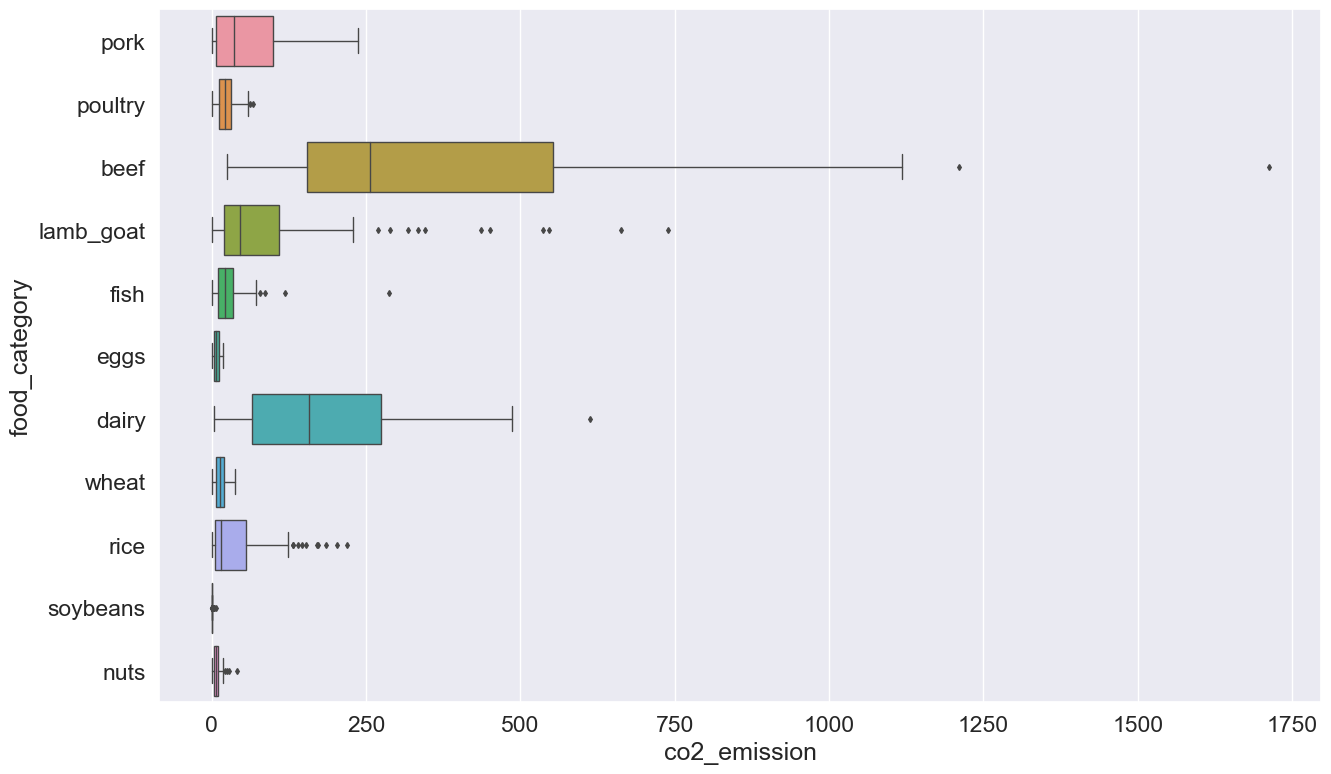

In [8]:
sns.boxplot(x = 'co2_emission', y = 'food_category', data = food, fliersize=3, linewidth=1)

In [9]:
# Q2 - Part 1

# As we can easily see from the boxplot, the category with the highest interquartile range (IQR) is beef

In [10]:
# Q2 - Part 2

# Similarly, we can observe that the category with the highest median value is beef again

### Part 2: Permutation Test

3. Let's consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table with descriptive statistics (from point 1), the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Let's create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do we accept or reject the null hypothesis?** 

In [11]:
# Q3 - Part 0

# select the portion of the dataframe that we need:
food_subset = food[(food['food_category']=='poultry') | (food['food_category']=='fish')][['food_category', 'consumption']]

food_subset = food_subset[['food_category', 'consumption']]
food_subset.head(8)

,food_category,consumption
1,poultry,38.66
4,fish,4.36
12,poultry,46.12
15,fish,17.69
23,poultry,13.23
26,fish,3.85
34,poultry,26.87
37,fish,74.41


In [12]:
# Q3 - Version 1

# select a null hypothesis H0:
print('H0: Average poultry consumption is not greater than the average fish consumption')
print('    (mu_polutry consumption <= mu_fish_consumption)')
print('')

# assign a significance level to the test:
alpha = 0.05
print(f'Significance level alpha: {alpha}')

# create the groups containing the values of treatment and control:
treatment = food_subset[(food_subset['food_category']=='poultry')]['consumption']
control = food_subset[(food_subset['food_category']=='fish')]['consumption']

# calculate the mean for each of the two groups and the difference between the two mean:
mu_treatment = np.mean(treatment)
mu_control = np.mean(control)
mu_diff = mu_treatment - mu_control
print(f'Average consumption difference: {mu_diff:.4f}')

H0: Average poultry consumption is not greater than the average fish consumption
    (mu_polutry consumption <= mu_fish_consumption)

Significance level alpha: 0.05
Average consumption difference: 3.9322


In [13]:
# Let's do the permutations:

n = 2000
mu_diff_samples = []
for i in range(n): 
    # extract a subsample of 50% of data without replacement
    df_sample1 = food_subset.sample(frac=0.5, replace=False)
    # use set() to get indexes of rows that were not extracted from df in previous step
    ix2 = set(food_subset.index) - set(df_sample1.index)
    # create dataframe with other 50% of data
    df_sample2 = food_subset.loc[list(ix2)]
    # calculate difference in mean from each sample
    mu_diff_temp = np.mean(df_sample1['consumption']) - np.mean(df_sample2['consumption'])
    # append sampled mean difference to mu_diff_samples list
    mu_diff_samples.append(mu_diff_temp)

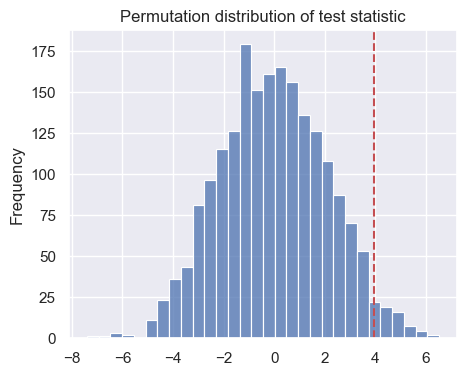

Average Simulated Test Statistic: -0.0276
Initially Observed Test Statistic: 3.9322

Results more extreme than observed: 58
Total results: 2000
p-value: 58 / 2000 = 0.029

Test outcome: H0 rejected. The observed result is statistically significant. | p_value <= alpha


In [14]:
# Let's plot the chart and print the results:

sns.set(rc={'figure.figsize':(5,4)})
sns.histplot(mu_diff_samples)
plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
## plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")
plt.title("Permutation distribution of test statistic")
plt.show()
print('Average Simulated Test Statistic:', f'{np.mean(mu_diff_samples):.4f}')
print('Initially Observed Test Statistic:', f'{mu_diff:.4f}')
print('')
print('Results more extreme than observed:', sum([el >= mu_diff for el in mu_diff_samples]))
print('Total results:', len(mu_diff_samples))
p_value = sum([el > mu_diff for el in mu_diff_samples])/n
print('p-value:', sum([el >= mu_diff for el in mu_diff_samples]), '/', len(mu_diff_samples), '=', p_value)
print('')

# view the result of the test:
if p_value <= alpha:
    print('Test outcome: H0 rejected. The observed result is statistically significant. | p_value <= alpha')
else:
    print('Test outcome: H0 not rejected. The observed result is not statistically significant. | p_value > alpha')

# CONCLUSION:
# Since the p-value is less than the significance level chosen at the beginning of the test, we can reject the null hypothesis

In [15]:
# I take advantage of this to define a slightly more general permutation function such that:
# given a DataFrame, a categorical column of the DataFrame, two categories within the said column,
# a column of values to test and the number of desired permutations,
# perform a permutation test to see if the difference between the mean of the treatment group is
# significantly greater than the mean of the control group and yield the desired results.

# IMPORTANT: The following function is valid only if the treatment and control groups 
#            are built on a single condition in a single column. And not, for example:
#             Treatment: Gender == Male & Country == Italy
#             Control: Gender == Male & Country == France   

def mu_diff_permutation_test(df, category_column, treatment_category, control_category,\
                             value_column, num_of_permutations=2000, alpha=0.05):
    # df = DataFrame
    # category_column = Column of df from which to extract the two categories on which to carry out the test
    # treatment_category = Category to be tested; is a value included in df[category_column]
    # control_category = Category to compare with treatment_category; is a value included in df[category_column]
    # value_column = Numeric type column of df; is the variable I would like to test between the two groups treatment and control
    # num_of_permutations = number of permutations performed in the test
    # alpha = Level of significance of the test
    
    print(f'H0: Average {treatment_category} {value_column} is not greater than average {control_category} {value_column}')
    print('')
    
    # select the level of significance of the test:
    while alpha<=0 or alpha >1:
        print("You need to insert an alpha-value between 0 and 1. Insert a valid value:")
        alpha = float(input("Significance level (alpha):"))
    
    # select the portion of my dataset that I want to use in the permutation test:
    df_subset = df[(df[category_column]==treatment_category) | (df[category_column]==control_category)]\
    [[category_column, value_column]]
    
    # select the treatment and control groups:
    treatment = df_subset[(df_subset[category_column]==treatment_category)][value_column]
    control = df_subset[(df_subset[category_column]==control_category)][value_column]
    
    # calculate the means and the difference between means:
    mu_treatment = np.mean(treatment)
    mu_control = np.mean(control)
    mu_diff = mu_treatment - mu_control
    
    # carry out the permutations with the code written previously:
    n = num_of_permutations
    mu_diff_samples = []
    for i in range(n): 
        # extract a subsample of 50% of data without replacement
        df_sample1 = df_subset.sample(frac=0.5, replace=False)
        # use set() to get indexes of rows that were not extracted from df in previous step
        ix2 = set(df_subset.index) - set(df_sample1.index)
        # create dataframe with other 50% of data
        df_sample2 = df_subset.loc[list(ix2)]
        # calculate difference in mean from each sample
        mu_diff_temp = np.mean(df_sample1[value_column]) - np.mean(df_sample2[value_column])
        # append sampled mean difference to mu_diff_samples list
        mu_diff_samples.append(mu_diff_temp)
    
    # select the chart size:
    sns.set(rc={'figure.figsize':(5,4)})
    # draw the chart:
    sns.histplot(mu_diff_samples)
    # display the value of mu_diff in the chart:
    plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
    # define the title of the chart:
    plt.title("Permutation distribution of test statistic")
    # enter a title for the axes:
    ## plt.xlabel("Value of Statistic")
    plt.ylabel("Frequency")
    # show the chart:
    plt.show()
    
    # print the results and the outcome of the test:
    print('Average Simulated Test Statistic:', f'{np.mean(mu_diff_samples):.4f}')
    print('Initially Observed Test Statistic:', f'{mu_diff:.4f}')
    print('')
    print('Results more extreme than observed:', sum([el >= mu_diff for el in mu_diff_samples]))
    print('Total results:', len(mu_diff_samples)) 
    p_value = sum([el > mu_diff for el in mu_diff_samples])/n
    print('p-value:', sum([el >= mu_diff for el in mu_diff_samples]), '/', len(mu_diff_samples), '=', p_value)
    print('')
    if p_value <= alpha:
        print('Test outcome: H0 rejected. The observed result is statistically significant. | p_value <= alpha')
    else:
        print('Test outcome: H0 not rejected. The observed result is not statistically significant. | p_value > alpha')
    
    return mu_diff, p_value


# I could refine the function by adding an alternative parameter ('two-sided', 'less', 'greater') 
# for the alternative hypothesis on which the p-value is calculated. For example:

# if alternative = 'greater' and p_value <= alpha:
#    print('Test outcome: H0 rejected etc. etc)
# elif alternative = 'less' and p_value >= (1-alpha):
#    print('Test outcome: H0 rejected etc. etc)
# elif alternative = 'two-sided' and (p_value <= alpha or p_value >= (1-alpha)):
#    print('Test outcome: etc. etc)
# else:
#    print('Test outcome: etc. etc)

H0: Average poultry consumption is not greater than average fish consumption



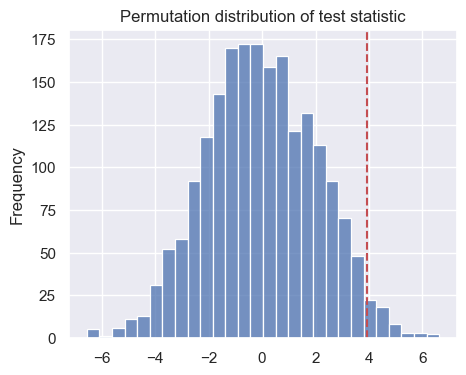

Average Simulated Test Statistic: -0.0289
Initially Observed Test Statistic: 3.9322

Results more extreme than observed: 48
Total results: 2000
p-value: 48 / 2000 = 0.024

Test outcome: H0 rejected. The observed result is statistically significant. | p_value <= alpha
H0: Average pork consumption is not greater than average fish consumption



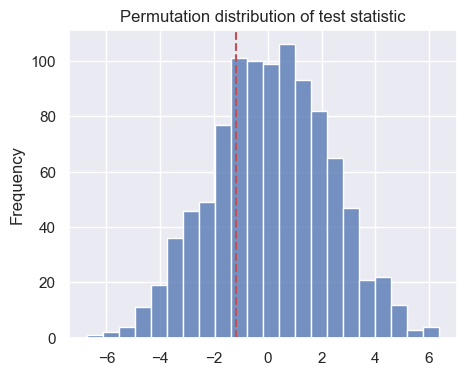

Average Simulated Test Statistic: 0.1294
Initially Observed Test Statistic: -1.1634

Results more extreme than observed: 725
Total results: 1000
p-value: 725 / 1000 = 0.725

Test outcome: H0 not rejected. The observed result is not statistically significant. | p_value > alpha


(-1.1633846153846186, 0.725)

In [21]:
# test the function::

mu_diff_permutation_test(food, 'food_category', 'poultry', 'fish', 'consumption')
mu_diff_permutation_test(food, 'food_category', 'pork', 'fish', 'consumption', 1000, alpha=0.05)

In [17]:
# Q3 Version 2 - Scipy Permutation Test

# remember:
food_subset = food[(food['food_category']=='poultry') | (food['food_category']=='fish')][['food_category', 'consumption']]
## food_subset['group'] = ['treatment' if el =='poultry' else 'control' for el in food_subset['food_category']]
## food_subset = food_subset[['group', 'food_category', 'consumption']]
food_subset = food_subset[['food_category', 'consumption']]

treatment = food_subset[(food_subset['food_category']=='poultry')]['consumption']
control = food_subset[(food_subset['food_category']=='fish')]['consumption']

In [18]:
# import the permutation_test function from scipy:
from scipy.stats import permutation_test

In [19]:
# convert the treatment and control groups in np.array format (i.e. in vectors):
treatment = np.array(treatment)
control = np.array(control)

H0: Average poultry consumption is not greater than the average fish consumption
    (mu_poultry consumption <= mu_fish_consumption)




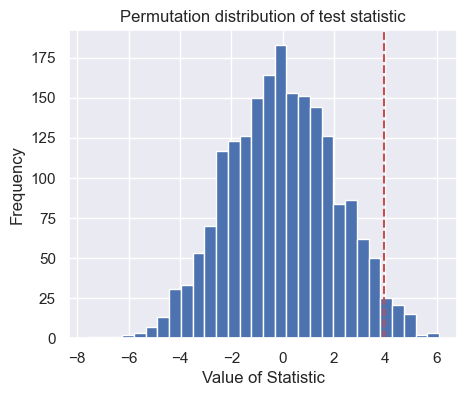


Average Simulated Test Statistic: -0.0236
Initially Observed Test Statistic: 3.9322

p-value: 0.0290

Test outcome: H0 rejected. The observed result is statistically significant. | p_value <= alpha


In [20]:
# define the null hypothesis:

print('H0: Average poultry consumption is not greater than the average fish consumption')
print('    (mu_poultry consumption <= mu_fish_consumption)')
print('')

# select the level of significance of the test:
alpha = 0.05

# define a function statistic(x, y) which defines and calculates the desired statistic, 
# i.e. the difference between the means of my two samples (mu_diff):
def statistic(x, y, axis=0):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

# define the parameters of the permutation test:
res = permutation_test((treatment, control),              # select the two sets of data I want to compare
                       statistic,                         # choose the statistic, previously defined, for which to compute the p-value
                       vectorized=True,                   # choose to set vectorized=True to reduce computation times
                       permutation_type='independent',    # choose the type of permutation desired (samples are independent)
                       n_resamples=2000,                  # select the number of permutations
                       alternative='greater',             # calculate the p-value as a percentage of null distribution greater than mu_diff
                       random_state=42)                   # set a random_state

# NOTE: I set the optional parameters axis=0 in the statistic function and vectorized=True in 
#       the permutation_test function to work with vectors and reduce computation times


mu_diff = res.statistic
p_value = res.pvalue
null_distribution = res.null_distribution

# The scipy statistics and permutation_test functions were compiled according to the following scipy documentation:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.permutation_test.html

print('')
sns.set(rc={'figure.figsize':(5,4)})
plt.hist(res.null_distribution, bins=30)
plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
plt.title("Permutation distribution of test statistic")
plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")
plt.show()

print('')
print('Average Simulated Test Statistic:', f'{np.mean(null_distribution):.4f}')
print(f'Initially Observed Test Statistic: {mu_diff:.4f}')
print('')
print(f'p-value: {p_value:.4f}')
print('')
if p_value <= alpha:
    print('Test outcome: H0 rejected. The observed result is statistically significant. | p_value <= alpha')
else:
    print('Test outcome: H0 not rejected. The observed result is not statistically significant. | p_value > alpha')